# Custom-designed Word Cloud

In [2]:
import numpy as np
import pandas as pd
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS

In this notebook, i'll generate a custom-shaped word cloud, based on the frequency of names in my list (using the awesome wordcloud library). 

In [25]:
names= pd.read_clipboard()

In [26]:
names.head()

,Names
0,Benoit
1,Gina
2,Diego
3,Saina
4,Carolina


In [114]:
total_names= pd.DataFrame([np.nan], columns= ['Name'])
total_names= total_names.dropna()
for name in names.Names.values:
    rand_num= np.random.randint(1,100)
    sample= pd.DataFrame(range(rand_num))
    sample['Name']= name
    total_names= pd.concat([total_names,sample], axis=0, ignore_index=True)

In [115]:
total_names.head()

,0,Name
0,0.0,Benoit
1,1.0,Benoit
2,2.0,Benoit
3,3.0,Benoit
4,4.0,Benoit


In [116]:
total_names.shape

(1683, 2)

In [117]:
total_names.sample(10)

,0,Name
786,16.0,Armen
1064,60.0,David
1283,18.0,Tatiana
636,54.0,Christine
1231,24.0,Gustavo
84,17.0,Saina
143,36.0,Carolina
784,14.0,Armen
236,34.0,Kenneth
671,33.0,Niraj


In [118]:
total_names['Name'].value_counts(ascending=False).head()

Aurora    99
David     85
Linnea    83
Alice     81
Gigi      72
Name: Name, dtype: int64

In [119]:
counts= total_names['Name'].value_counts(ascending=False)#.to_frame().reset_index()
counts.head()

Aurora    99
David     85
Linnea    83
Alice     81
Gigi      72
Name: Name, dtype: int64

In [120]:
#' '.join(list(total_names['Name'].values.flatten()))

In [121]:
text= counts.to_dict()
text.items()

[('Tatiana', 37),
 ('Saina', 40),
 ('Gustavo', 58),
 ('Favio', 42),
 ('Diego', 31),
 ('Gigi', 72),
 ('Ramallos', 45),
 ('Martha', 64),
 ('Liz', 71),
 ('Carolina', 38),
 ('Benoit', 28),
 ('Aurora', 99),
 ('Gina', 8),
 ('Sheyla', 52),
 ('Deysi', 63),
 ('Cristhian', 43),
 ('Christine', 56),
 ('Linnea', 83),
 ('Alice', 81),
 ('David', 85),
 ('Zulema', 23),
 ('Ingrid', 67),
 ('Niraj', 51),
 ('Kenneth', 38),
 ('Ron', 63),
 ('George', 5),
 ('Armen', 39),
 ('Siddharth', 69),
 ('Lule', 62),
 ('Azucar', 46),
 ('Nicole', 62),
 ('Emily', 62)]

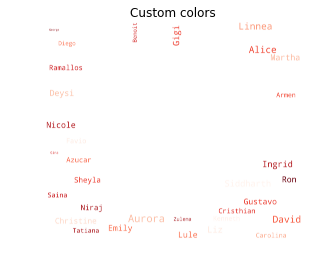

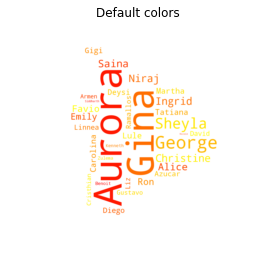

In [127]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open("tnt_heart_logo_binary_2_large.png"))

text= total_names['Name'].values
wc = WordCloud(max_words=1565, mask=mask, margin=10, random_state=1, 
               background_color= 'white', colormap= 'Reds',
               collocations=False).generate(' '.join(list(total_names['Name'].values.flatten())))
# store default colored image
#default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(colormap='Reds', random_state=3),
           interpolation="bilinear")
wc.to_file("word_cloud_heart.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()